# Auto-Encoder with Keras

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

D:\study\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 数据预处理

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255. - 0.5   #把像素值限制到-0.5 to 0.5
x_test = x_test.astype('float32') / 255. - 0.5

x_train = x_train.reshape((x_train.shape[0], -1))  # 将28X28的像素矩阵转化为行向量
x_test = x_test.reshape((x_test.shape[0], -1))

## 建模

In [3]:
def dataPreProcess(x_train):
    x_train = x_train.reshape(x_train.shape[0], -1)
    
    return x_train

In [4]:
# encoder section
def autoEncoder_train(x_train, encoded_dim=8):
#     x_train = dataPreProcess(x_train)

    input_img = Input(shape=(x_train.shape[1], ))   # 实例化1个tensor
    encoded_model = Dense(128, activation='relu')(input_img)
    encoded_model = Dense(64, activation='relu')(encoded_model)
    encoded_model = Dense(10, activation='relu')(encoded_model)
    code_layer = Dense(encoded_dim)(encoded_model)
    
    decoded_model = Dense(10, activation='relu')(code_layer)
    decoded_model = Dense(64, activation='relu')(decoded_model)
    decoded_model = Dense(128, activation='relu')(decoded_model)
    decoded_model = Dense(784, activation='relu')(decoded_model)
    
    output_decoded_picture = Model(input_img, decoded_model)
    output_decoded_picture.compile(loss='mse', optimizer='Adam')
    output_decoded_picture.fit(x_train, x_train, epochs=1)
    
    output_code = Model(input_img, code_layer)
    
    return output_code, output_decoded_picture

In [5]:
output_code_layer, output_decoded_picture_layer = autoEncoder_train(x_train)

Epoch 1/1
60000/60000 [==============================] - 12s 202us/step - loss: 0.2298


In [6]:
def autoEncoder(picture):
    plt.ion()
    print('original picture↓')
    plt.imshow(picture.reshape(28, 28), cmap='Greys')
    plt.show()
#     output_code_layer, output_decoded_picture_layer = autoEncoder_train(x_train, encoded_dim)
    code = output_code_layer.predict(picture.reshape(-1, 784))
    decoded_picture = output_decoded_picture_layer.predict(picture.reshape(-1, 784))
    
    print('decoded picture↓')
    plt.imshow(decoded_picture[0].reshape(28, 28), cmap='Greys')
    plt.show()
    
    return code

original picture↓


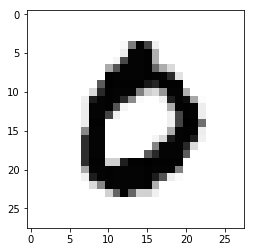

decoded picture↓


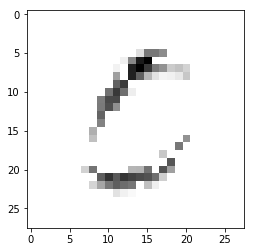

In [20]:
code = autoEncoder(x_test[3])

answer: 注意Model对象的predict, fit方法都要求输入的对象是ndarray, 不能是(784, )之类的1阶ndarray, 如果要输入单个样本, 用 sample.reshape(-1, 任意数字), 这样就转化成了2阶ndarray. 在scikit-learn中, estimator的predict, fit方法也有这样的要求, 值得注意

也许上述要求是因为Input(shape(123, ))的原因?也许这样就能处理一次输入多个样本并给出estimation